In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [70]:
df = pd.read_csv('/content/drive/MyDrive/datasets/financial_sentiment.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [71]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [72]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [73]:
X = df['Sentence']
Y = pd.get_dummies(df['Sentiment'])

In [74]:
num_classes = len(Y.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [75]:
max_tokens = 64

tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [76]:
max_len = 16

for ex in X_train:
  if('etro source .' in ex):
    ex = ex[:-2]

X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

In [77]:
X_train.shape, X_test.shape

((4673, 16), (1169, 16))

In [78]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

In [80]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [81]:
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=10)

Epoch 1/10
59/59 [==============================] - 7s 23ms/step - loss: 0.9918 - precision: 0.5681 - recall: 0.3558 - val_loss: 0.9414 - val_precision: 0.6279 - val_recall: 0.4332
Epoch 2/10
59/59 [==============================] - 1s 14ms/step - loss: 0.9170 - precision: 0.6808 - recall: 0.3949 - val_loss: 0.8985 - val_precision: 0.7020 - val_recall: 0.3754
Epoch 3/10
59/59 [==============================] - 1s 14ms/step - loss: 0.8951 - precision: 0.7119 - recall: 0.3721 - val_loss: 0.8915 - val_precision: 0.7421 - val_recall: 0.3508
Epoch 4/10
59/59 [==============================] - 1s 15ms/step - loss: 0.8794 - precision: 0.6930 - recall: 0.4428 - val_loss: 0.8744 - val_precision: 0.6730 - val_recall: 0.4909
Epoch 5/10
59/59 [==============================] - 1s 14ms/step - loss: 0.8617 - precision: 0.6932 - recall: 0.4727 - val_loss: 0.8732 - val_precision: 0.6662 - val_recall: 0.4888
Epoch 6/10
59/59 [==============================] - 1s 14ms/step - loss: 0.8456 - precision: 0.

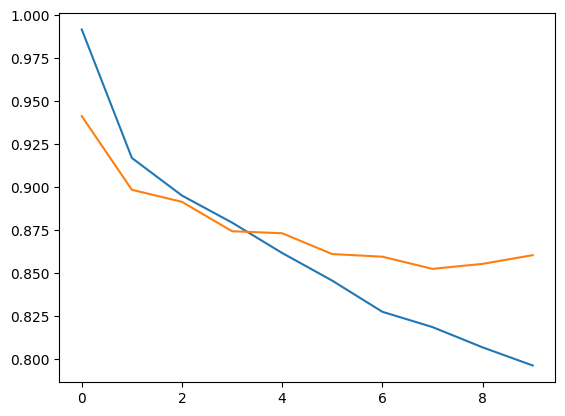

In [82]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

In [83]:
preds = model.predict(X_test)

37/37 [==============================] - 1s 10ms/step


In [84]:
print(classification_report(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.05      0.08       165
           1       0.68      0.78      0.72       637
           2       0.51      0.57      0.53       367

    accuracy                           0.61      1169
   macro avg       0.49      0.46      0.45      1169
weighted avg       0.57      0.61      0.57      1169

